## Imports

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
from os.path import exists
import torch
from torchvision import transforms
import base64

import os
import sys
import dlib

## Files

In [ ]:
!git clone https://<private-github-repo-token>@github.com/<User>/<repo-name>.git

Cloning into 'wstep_do_ai'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 196 (delta 7), reused 85 (delta 7), pack-reused 111
Receiving objects: 100% (196/196), 33.74 MiB | 31.52 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## AffectNet

In [ ]:
affect_exp_dict = { 0: 'Neutral',
                    1: 'Happy',
                    2: 'Sad',
                    3: 'Surprise',
                    4: 'Fear',
                    5: 'Disgust',
                    6: 'Anger',
                    7: 'Contempt' }

# Valence: valence value of the expression in interval [-1,+1] (for Uncertain and No-face categories the value is -2)
# Arousal: arousal value of the expression in interval [-1,+1] (for Uncertain and No-face categories the value is -2)

df = []
for i in os.scandir('/content/wstep_do_ai/affectnet'):
  num = i.name.strip('.jpg')
  if exists("/content/wstep_do_ai/annotations/"+num+"_exp.npy"):
      df.append([i.name,affect_exp_dict[int(np.load("/content/wstep_do_ai/annotations/"+num+"_exp.npy"))], None, None, None, None, None, None, None, None, None])

df_affectnet = pd.DataFrame(data = df,
                  columns = ['Image','Expression','Head_pose','Blurr_score', 'Blurr_classification','Expression_Kairos', 'Expression_Face++', 'Expression_HF_1', 'Expression_HF_2', 'Expression_HF_3', 'Expression_HF_4'])

df_affectnet.head(10)

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,1563.jpg,Sad,None,None,None,None,None,None,None,None,None
1,1753.jpg,Anger,None,None,None,None,None,None,None,None,None
2,2049.jpg,Happy,None,None,None,None,None,None,None,None,None
3,1749.jpg,Neutral,None,None,None,None,None,None,None,None,None
4,1228.jpg,Sad,None,None,None,None,None,None,None,None,None
5,1672.jpg,Fear,None,None,None,None,None,None,None,None,None
6,1827.jpg,Sad,None,None,None,None,None,None,None,None,None
7,2059.jpg,Sad,None,None,None,None,None,None,None,None,None
8,193.jpg,Happy,None,None,None,None,None,None,None,None,None
9,175.jpg,Anger,None,None,None,None,None,None,None,None,None


## Radboud (representative)

In [ ]:
df = []
for i in os.scandir('/content/wstep_do_ai/radboud'):
  img_name_table = i.name.split('_')
  df.append([i.name, img_name_table[len(img_name_table)-2], img_name_table[len(img_name_table)-1][:-4],None, None, None, None, None, None, None, None])

df_radboud = pd.DataFrame(data = df,
                  columns = ['Image','Expression','Head_pose','Blurr_score', 'Blurr_classification','Expression_Kairos', 'Expression_Face++', 'Expression_HF_1', 'Expression_HF_2', 'Expression_HF_3', 'Expression_HF_4'])

df_radboud.head()

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,Rafd045_15_Caucasian_male_fearful_frontal.jpg,fearful,frontal,None,None,None,None,None,None,None,None
1,Rafd045_11_Kid_female_angry_right.jpg,angry,right,None,None,None,None,None,None,None,None
2,Rafd090_30_Caucasian_male_fearful_right.jpg,fearful,right,None,None,None,None,None,None,None,None
3,Rafd045_01_Caucasian_female_angry_right.jpg,angry,right,None,None,None,None,None,None,None,None
4,Rafd090_41_Kid_female_angry_right.jpg,angry,right,None,None,None,None,None,None,None,None


## Amsterdam

### North Europe

In [ ]:
df = []
for i in os.scandir('/content/wstep_do_ai/amsterdam/NorthEurope'):
  img_name_table = i.name.split('-')
  df.append([i.name, img_name_table[1].strip('.jpg'), None, None, None, None, None, None, None, None, None])

df_amsterdam_NE = pd.DataFrame(data = df,
                  columns = ['Image','Expression', 'Head_pose', 'Blurr_score', 'Blurr_classification', 'Expression_Kairos', 'Expression_Face++', 'Expression_HF_1', 'Expression_HF_2', 'Expression_HF_3', 'Expression_HF_4'])

df_amsterdam_NE.head()

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,F03-Neutral.jpg,Neutral,None,None,None,None,None,None,None,None,None
1,F01-Disgust-Apex.jpg,Disgust,None,None,None,None,None,None,None,None,None
2,M02-Joy-Apex.jpg,Joy,None,None,None,None,None,None,None,None,None
3,F03-Disgust-Apex.jpg,Disgust,None,None,None,None,None,None,None,None,None
4,F02-Embarrass-Apex.jpg,Embarrass,None,None,None,None,None,None,None,None,None


### Mediterranean

In [ ]:
df = []
for i in os.scandir('/content/wstep_do_ai/amsterdam/Mediterranean'):
  img_name_table = i.name.split('-')
  df.append([i.name, img_name_table[1].strip('.jpg'), None, None, None, None, None, None, None, None, None])

df_amsterdam_MT = pd.DataFrame(data = df,
                  columns = ['Image','Expression', 'Head_pose', 'Blurr_score', 'Blurr_classification', 'Expression_Kairos', 'Expression_Face++', 'Expression_HF_1', 'Expression_HF_2', 'Expression_HF_3', 'Expression_HF_4'])

df_amsterdam_MT.head()

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,F08-Sad-Apex.jpg,Sad,None,None,None,None,None,None,None,None,None
1,M01-Fear-Apex.jpg,Fear,None,None,None,None,None,None,None,None,None
2,F09-Embarrass-Apex.jpg,Embarrass,None,None,None,None,None,None,None,None,None
3,F07-Contempt-Apex.jpg,Contempt,None,None,None,None,None,None,None,None,None
4,M05-Joy-Apex.jpg,Joy,None,None,None,None,None,None,None,None,None


## Functions for simulating/detecting special cases

### Blur detection


Optimal score is **100**, meaning that images with score higher than **100** are considered NOT BLURRY.

NOTE: \
Images with sharp foreground and a small (area), blurry background may still be classified as blurry.

https://pyimagesearch.com/2015/09/07/blur-detection-with-opencv/

In [ ]:
def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv.Laplacian(image, cv.CV_64F).var()

### Background removal

https://huggingface.co/spaces/eugenesiow/remove-bg

In [ ]:
def load_model():
  model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)
  model.eval()
  return model

def make_transparent_foreground(pic, mask):
  # split the image into channels
  b, g, r = cv.split(np.array(pic).astype('uint8'))
  # add an alpha channel with and fill all with transparent pixels (max 255)
  a = np.ones(mask.shape, dtype='uint8') * 255
  # merge the alpha channel back
  alpha_im = cv.merge([b, g, r, a], 4)
  # create a transparent background
  bg = np.zeros(alpha_im.shape)
  # setup the new mask
  new_mask = np.stack([mask, mask, mask, mask], axis=2)
  # copy only the foreground color pixels from the original image where mask is set
  foreground = np.where(new_mask, alpha_im, bg).astype(np.uint8)

  return foreground

def remove_background(model, input_file):
  input_image = Image.open(input_file)
  preprocess = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)

  # create a binary (black and white) mask of the profile foreground
  mask = output_predictions.byte().cpu().numpy()
  background = np.zeros(mask.shape)
  bin_mask = np.where(mask, 255, background).astype(np.uint8)

  foreground = make_transparent_foreground(input_image ,bin_mask)

  return cv.cvtColor(foreground, cv.COLOR_BGR2RGB), bin_mask

In [ ]:
deeplab_model = load_model()

Downloading: "https://github.com/pytorch/vision/zipball/v0.6.0" to /root/.cache/torch/hub/v0.6.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:01<00:00, 221MB/s]


In [ ]:
foreground, bin_mask = remove_background(deeplab_model, '/content/wstep_do_ai/radboud/Rafd000_02_Caucasian_female_sad_frontal.jpg')
cv2_imshow(foreground)

### Image colors reduction using K-means clustering

https://www.geeksforgeeks.org/color-quantization-using-k-means-in-scikit-learn/

In [ ]:
#REDUCING IMAGE COLORS WITH K-MEANS CLUSTERING
from sklearn.cluster import KMeans

def reduce_colors(image, num_clusters):
  # Reshape the image into a 2D array of pixels
  pixels = image.reshape((-1, 3))


  # Apply k-means clustering
  kmeans = KMeans(n_clusters=num_clusters) #<-------- NUMBER OF CLUSTERS
  # For warn suppresion
  kmeans.n_init = 10
  kmeans.fit(pixels)
  new_colors = kmeans.cluster_centers_.astype('uint8')
  labels = kmeans.labels_
  result = new_colors[labels].reshape(image.shape)


  return result

img = cv.imread('/content/wstep_do_ai/radboud/Rafd000_02_Caucasian_female_sad_frontal.jpg')
cv2_imshow(reduce_colors(img, 8))


### Head pose estimation

Face detection used in this code: dlib.get_frontal_face_detector() \\
You may use diffrent face detection model that better deals with non-frontal faces with dlib.cnn_face_detection_model_v1(modelPath)

Read more: https://pyimagesearch.com/2021/04/19/face-detection-with-dlib-hog-and-cnn/

https://github.com/by-sabbir/HeadPoseEstimation

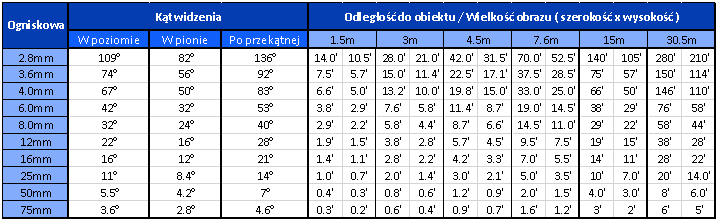

In [ ]:
!pip install -r '/content/wstep_do_ai/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 55.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 34.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==4.2.0.34 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-contrib-python==4.2

In [ ]:
!bash '/content/wstep_do_ai/downloader.sh'

--2023-06-11 14:33:28--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   105MB/s    in 0.6s    

2023-06-11 14:33:29 (105 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

Extracting files...
  shape_predictor_68_face_landmarks.dat.bz2: done
**************
Done!
**************


In [ ]:
def drawPolyline(img, shapes, start, end, isClosed=False):
    points = []
    for i in range(start, end + 1):
        point = [shapes.part(i).x, shapes.part(i).y]
        points.append(point)
    points = np.array(points, dtype=np.int32)
    cv.polylines(img, [points], isClosed, (255, 80, 0),
                  thickness=1, lineType=cv.LINE_8)

def draw(img, shapes):
    drawPolyline(img, shapes, 0, 16)
    drawPolyline(img, shapes, 17, 21)
    drawPolyline(img, shapes, 22, 26)
    drawPolyline(img, shapes, 27, 30)
    drawPolyline(img, shapes, 30, 35, True)
    drawPolyline(img, shapes, 36, 41, True)
    drawPolyline(img, shapes, 42, 47, True)
    drawPolyline(img, shapes, 48, 59, True)
    drawPolyline(img, shapes, 60, 67, True)

def ref3DModel():
    modelPoints = [[0.0, 0.0, 0.0],
                   [0.0, -330.0, -65.0],
                   [-225.0, 170.0, -135.0],
                   [225.0, 170.0, -135.0],
                   [-150.0, -150.0, -125.0],
                   [150.0, -150.0, -125.0]]
    return np.array(modelPoints, dtype=float)


def ref2dImagePoints(shape):
    imagePoints = [[shape.part(30).x, shape.part(30).y],
                   [shape.part(8).x, shape.part(8).y],
                   [shape.part(36).x, shape.part(36).y],
                   [shape.part(45).x, shape.part(45).y],
                   [shape.part(48).x, shape.part(48).y],
                   [shape.part(54).x, shape.part(54).y]]
    return np.array(imagePoints, dtype=float)


def cameraMatrix(fl, center):
    mat = [[fl, 1, center[0]],
                    [0, fl, center[1]],
                    [0, 0, 1]]
    return np.array(mat, dtype=float)

def estimateHeadPose(img):
  detector = dlib.get_frontal_face_detector() # <-------------------------------------------------!!!
  predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

  im = img

  faces = detector(cv.cvtColor(im, cv.COLOR_BGR2RGB), 0)
  # print(len(faces))

  face3Dmodel = ref3DModel()

  for face in faces:
    shape = predictor(cv.cvtColor(im, cv.COLOR_BGR2RGB), face)

    # draw(im, shape)      # DRAWING LINES ON FACE FROM POINTS

    refImgPts = ref2dImagePoints(shape)

    height, width, channel = im.shape
    focalLength = 8.0 * width # <------------------------------------------------------------------ FOCAL LENGTH
    camMatrix = cameraMatrix(focalLength, (height / 2, width / 2))

    mdists = np.zeros((4, 1), dtype=float)

    # calculate rotation and translation vector using solvePnP
    success, rotationVector, translationVector = cv.solvePnP(
        face3Dmodel, refImgPts, camMatrix, mdists)

    noseEndPoints3D = np.array([[0, 0, 1000.0]], dtype=float)
    noseEndPoint2D, jacobian = cv.projectPoints(
        noseEndPoints3D, rotationVector, translationVector, camMatrix, mdists)

    # # draw nose line
    # p1 = (int(refImgPts[0, 0]), int(refImgPts[0, 1]))
    # p2 = (int(noseEndPoint2D[0, 0, 0]), int(noseEndPoint2D[0, 0, 1]))
    # cv.line(im, p1, p2, (110, 220, 0),
    #           thickness=2, lineType=cv.LINE_AA)

    # calculating angle
    rmat, jac = cv.Rodrigues(rotationVector)
    angles, mtxR, mtxQ, Qx, Qy, Qz = cv.RQDecomp3x3(rmat)

    # print('*' * 80)
    # print("Angle: ", angles)
    # # print(f"Qx:{Qx}\tQy:{Qy}\tQz:{Qz}\t")
    # x = np.arctan2(Qx[2][1], Qx[2][2])
    # y = np.arctan2(-Qy[2][0], np.sqrt((Qy[2][1] * Qy[2][1] ) + (Qy[2][2] * Qy[2][2])))
    # z = np.arctan2(Qz[0][0], Qz[1][0])
    # print("AxisX: ", x)
    # print("AxisY: ", y)
    # print("AxisZ: ", z)
    # print('*' * 80)

    # gaze = "Looking: "
    gaze = ""
    if angles[1] < -15:
        gaze += "Left"
    elif angles[1] > 15:
        gaze += "Right"
    else:
        gaze += "Forward"
    # cv.putText(im, gaze, (20, 20), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 80), 2)
    # cv2_imshow(im)
    return gaze

### Image shake simulation

https://stackoverflow.com/questions/40817634/opencv-how-to-add-artificial-smudge-motion-blur-effects-to-a-whole-image

To change intensity of the shake edit the **axes** value

In [ ]:
def image_shake(image, axes_value=22):
  psf = np.zeros((50, 50, 3))
  psf = cv.ellipse(psf,
                    (25, 25), # center
                    (axes_value, 0), # axes -- 22 for blur length, 0 for thin PSF
                    15, # angle of motion in degrees
                    0, 360, # ful ellipse, not an arc
                    (1, 1, 1), # white color
                    thickness=-1) # filled

  psf /= psf[:,:,0].sum() # normalize by sum of one channel
                          # since channels are processed independently

  return cv.filter2D(image, -1, psf)

### Contrast and Brightness manipulation

Use OpenCV cv.convertScaleAbs(...), returns image

Alpha is the contrast value. To lower the contrast, use 0 < alpha < 1. And for higher contrast use alpha > 1. \\
Beta is the brightness value. A good range for brightness value is [-127, 127]



In [ ]:
def image_contrast_brightness(image, alpha, beta):
  return cv.convertScaleAbs(image, alpha=alpha, beta=beta)

### Image resize

Use OpenCV cv.resize(...), returns image

In [ ]:
def image_resize(image, width, height):
  dim = (width,height)
  return cv.resize(image, dim, interpolation = cv.INTER_AREA)

# Image with implemented simulations


(512, 512, 3)


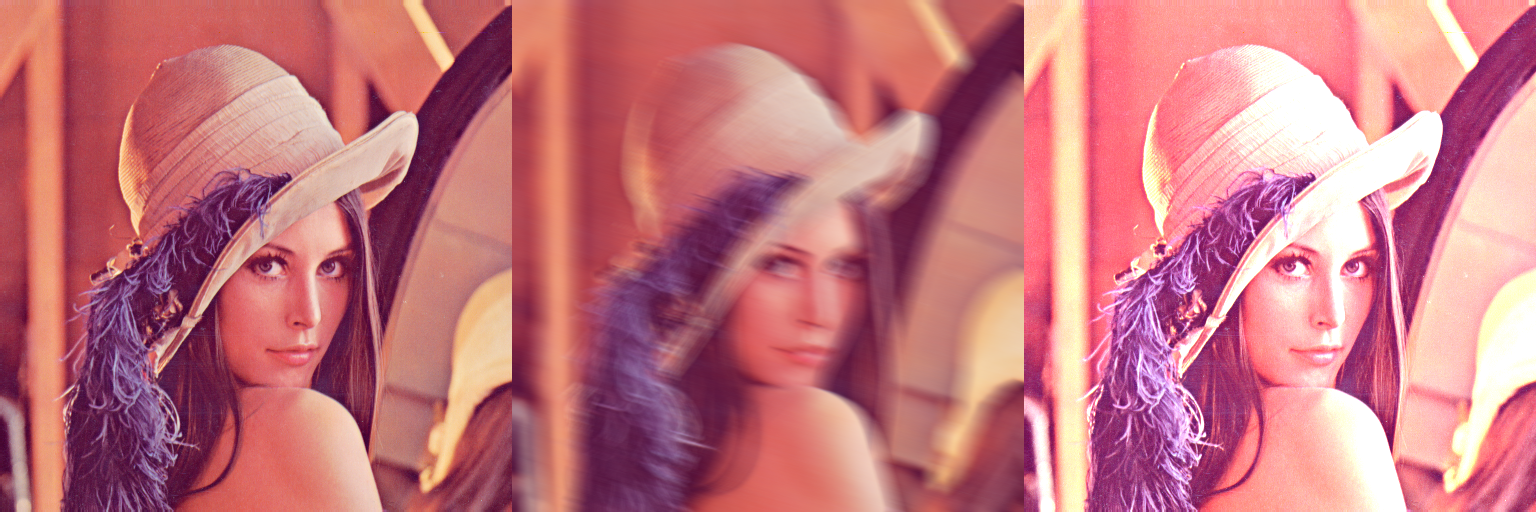

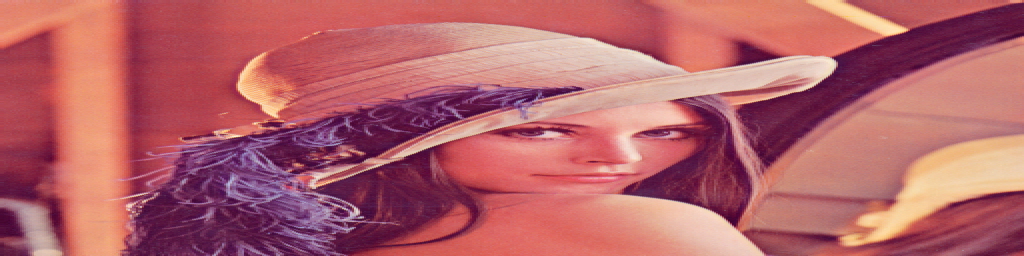

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
image = io.imread(url)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image,image_shake(image,12),image_contrast_brightness(image,1.5,10)))
print(image.shape)
cv2_imshow(final_frame)
cv2_imshow(image_resize(image,1024,256))

## Applying effect once, to all photos

Use this to replace default photos with photo with effect, useful if emulating situation takes very long (eg. bg removal).

You can use it in default, to reset just clone repository / upload files again.

In [ ]:
# for i in os.scandir('/content/wstep_do_ai/amsterdam/Mediterranean'):
#   img = cv.imread(i.path)
#   img = image_contrast_brightness(img,1.5,10)
#   cv.imwrite(i.path, img=img)

# for i in os.scandir('/content/wstep_do_ai/amsterdam/NorthEurope'):
#   img = cv.imread(i.path)
#   img = image_contrast_brightness(img,1.5,10)
#   cv.imwrite(i.path, img=img)

# for i in os.scandir('/content/wstep_do_ai/radboud'):
#   img = cv.imread(i.path)
#   img = image_contrast_brightness(img,1.5,10)
#   cv.imwrite(i.path, img=img)

# for i in os.scandir('/content/wstep_do_ai/affectnet'):
#   img = cv.imread(i.path)
#   img = image_contrast_brightness(img,1.5,10)
#   cv.imwrite(i.path, img=img)

# Fragment of dataset with new labels

# TESTING SECTION

In [ ]:
import requests
import base64
from io import BytesIO
import json

In [ ]:
amsterdam_MT_path = '/content/wstep_do_ai/amsterdam/Mediterranean'
amsterdam_NE_path = '/content/wstep_do_ai/amsterdam/NorthEurope'
radboud_path = '/content/wstep_do_ai/radboud'
affectnet_path = '/content/wstep_do_ai/affectnet'

## Adding labels

In [ ]:
def add_labels(dataset, dataset_path):
  for i in os.scandir(dataset_path):
      img = cv.imread(i.path)

      #Adding effect
      # img, bin_mask = remove_background(deeplab_model, i.path)

      dataset.loc[dataset['Image'] == i.name, 'Head_pose'] = estimateHeadPose(img)
      dataset.loc[dataset['Image'] == i.name, 'Blurr_score'] = variance_of_laplacian(img)
      dataset.loc[dataset['Image'] == i.name, 'Blurr_classification'] = variance_of_laplacian(img) < 100

add_labels(df_amsterdam_MT,amsterdam_MT_path)
add_labels(df_amsterdam_NE,amsterdam_NE_path)
add_labels(df_radboud,radboud_path)
add_labels(df_affectnet,affectnet_path)


In [ ]:
df_amsterdam_MT

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,F08-Sad-Apex.jpg,Sad,Forward,327.445899,False,None,None,None,None,None,None
1,M01-Fear-Apex.jpg,Fear,Right,631.147041,False,None,None,None,None,None,None
2,F09-Embarrass-Apex.jpg,Embarrass,Forward,438.635954,False,None,None,None,None,None,None
3,F07-Contempt-Apex.jpg,Contempt,Forward,982.773066,False,None,None,None,None,None,None
4,M05-Joy-Apex.jpg,Joy,Forward,597.811943,False,None,None,None,None,None,None
5,F09-Joy-Apex.jpg,Joy,Forward,827.962594,False,None,None,None,None,None,None
6,F07-Embarrass-Apex.jpg,Embarrass,Forward,1074.643134,False,None,None,None,None,None,None
7,M09-Embarrass-Apex.jpg,Embarrass,Forward,259.827107,False,None,None,None,None,None,None
8,F10-Sad-Apex.jpg,Sad,Right,261.821789,False,None,None,None,None,None,None
9,M09-Sad-Apex.jpg,Sad,Right,261.945966,False,None,None,None,None,None,None


## KAIROS
https://www.kairos.com/docs/api/

**Required Parameters**

- **image** Publicly accessible URL, file upload or Base64 encoded photo.
- **subject_id** Defined by you. Is used as an identifier for the face.
- **gallery_name** Defined by you. Is used to identify the gallery.

**Optional Parameters**

- **minHeadScale** Defined by you. Is used to set the ratio of the smallest face we should look for in the photo. Accepts a value between .015 (1:64 scale) and .5 (1:2 scale). By default it is set at .015 (1:64 scale) if not specified.
- **multiple_faces** If set to true lets the API enroll every face found in your photo under the same subject_id.
- **selector** LIVENESS used to predict spoof-attacks.

In [ ]:
headers = {
    "app_id": "ID",
    "app_key": "API-KEY"
}

# API endpoint URL
url = "https://api.kairos.com/v2/media"

def process_kairos_response(df, dataset_path, df_column_name):
  for i in os.scandir(dataset_path):
    print(i.name)
    img = cv.imread(i.path)

    #Adding effect
    # img, bin_mask = remove_background(deeplab_model, i.path)

    is_suc, jpg_img = cv.imencode('.jpg', img)

    files= [("source", jpg_img)]
    response = requests.post(url, headers=headers, files=files)

    response_json = response.json()

    if "frames" in response_json:
      for frame in response_json["frames"]:
          if "people" in frame:
            for person in frame["people"]:
              if "emotions" in person:
                emotions = person["emotions"]
                emotion_detected = max(emotions, key=emotions.get)

                if emotions[emotion_detected] == 0:
                  continue

                df.loc[df['Image'] == i.name, df_column_name] = emotion_detected


In [ ]:
# img = cv.imread("/content/wstep_do_ai/amsterdam/Mediterranean/F06-Anger-Apex.jpg")
# cv2_imshow(img)
# is_suc, jpg_img = cv.imencode('.jpg', img)
# byte_img = jpg_img.tobytes()
# b64_img = base64.b64encode(jpg_img).decode('utf-8')
# valGalView = {"gallery_name": "emotions"}

process_kairos_response(df_amsterdam_MT, amsterdam_MT_path, 'Expression_Kairos')
process_kairos_response(df_amsterdam_NE, amsterdam_NE_path, 'Expression_Kairos')
process_kairos_response(df_radboud, radboud_path, 'Expression_Kairos')
process_kairos_response(df_affectnet, affectnet_path, 'Expression_Kairos')

F08-Sad-Apex.jpg
M01-Fear-Apex.jpg
F09-Embarrass-Apex.jpg
F07-Contempt-Apex.jpg
M05-Joy-Apex.jpg
F09-Joy-Apex.jpg
F07-Embarrass-Apex.jpg
M09-Embarrass-Apex.jpg
F10-Sad-Apex.jpg
M09-Sad-Apex.jpg
M05-Anger-Apex.jpg
F08-Disgust-Apex.jpg
M09-Anger-Apex.jpg
M10-Joy-Apex.jpg
F06-Anger-Apex.jpg
F06-Neutral.jpg
F08-Fear-Apex.jpg
M10-Fear-Apex.jpg
F09-Surprise-Apex.jpg
F06-Disgust-Apex.jpg
M01-Sad-Apex.jpg
F10-Anger-Apex.jpg
M07-Contempt-Apex.jpg
F07-Pride-Apex.jpg
M07-Neutral.jpg
M05-Surprise-Apex.jpg
M09-Disgust-Apex.jpg
M10-Disgust-Apex.jpg
M10-Surprise-Apex.jpg
F10-Joy-Apex.jpg
F03-Neutral.jpg
F01-Disgust-Apex.jpg
M02-Joy-Apex.jpg
F03-Disgust-Apex.jpg
F02-Embarrass-Apex.jpg
F02-Joy-Apex.jpg
F04-Pride-Apex.jpg
F05-Fear-Apex.jpg
F04-Embarrass-Apex.jpg
F02-Contempt-Apex.jpg
F03-Fear-Apex.jpg
F05-Sad-Apex.jpg
F01-Fear-Apex.jpg
F04-Joy-Apex.jpg
F05-Neutral.jpg
F01-Anger-Apex.jpg
Rafd045_15_Caucasian_male_fearful_frontal.jpg
Rafd045_11_Kid_female_angry_right.jpg
Rafd090_30_Caucasian_male_fearful_

## FACE++

In [ ]:
url = "https://api-us.faceplusplus.com/facepp/v3/detect" # posting image

# Request parameters
payload = {
    "api_key": "API_KEY",
    "api_secret": "API_SECRET",
    "return_landmark": "1",
    "return_attributes": "emotion"
}


def process_facepp_response(df, dataset_path, df_column_name):
  for i in os.scandir(dataset_path):
    print(i.name)
    img = cv.imread(i.path)

    #Adding effect
    #img, bin_mask = remove_background(deeplab_model, i.path)

    is_suc, jpg_img = cv.imencode('.jpg', img)
    files = {
        "image_file": jpg_img
    }

    response = requests.post(url, data=payload, files=files)

    # Process the response
    response_json = response.json()

    # print the emotion attributes
    if "faces" in response_json:
        for face in response_json["faces"]:
            if "attributes" in face:
              emotions = face["attributes"]["emotion"]
              emotion_detected = max(emotions, key=emotions.get)

              if emotions[emotion_detected] == 0:
                continue

              df.loc[df['Image'] == i.name, df_column_name] = emotion_detected

In [ ]:
process_facepp_response(df_amsterdam_MT, amsterdam_MT_path, 'Expression_Face++')
process_facepp_response(df_amsterdam_NE, amsterdam_NE_path, 'Expression_Face++')
process_facepp_response(df_radboud, radboud_path, 'Expression_Face++')
process_facepp_response(df_affectnet, affectnet_path, 'Expression_Face++')

F08-Sad-Apex.jpg
M01-Fear-Apex.jpg
F09-Embarrass-Apex.jpg
F07-Contempt-Apex.jpg
M05-Joy-Apex.jpg
F09-Joy-Apex.jpg
F07-Embarrass-Apex.jpg
M09-Embarrass-Apex.jpg
F10-Sad-Apex.jpg
M09-Sad-Apex.jpg
M05-Anger-Apex.jpg
F08-Disgust-Apex.jpg
M09-Anger-Apex.jpg
M10-Joy-Apex.jpg
F06-Anger-Apex.jpg
F06-Neutral.jpg
F08-Fear-Apex.jpg
M10-Fear-Apex.jpg
F09-Surprise-Apex.jpg
F06-Disgust-Apex.jpg
M01-Sad-Apex.jpg
F10-Anger-Apex.jpg
M07-Contempt-Apex.jpg
F07-Pride-Apex.jpg
M07-Neutral.jpg
M05-Surprise-Apex.jpg
M09-Disgust-Apex.jpg
M10-Disgust-Apex.jpg
M10-Surprise-Apex.jpg
F10-Joy-Apex.jpg
F03-Neutral.jpg
F01-Disgust-Apex.jpg
M02-Joy-Apex.jpg
F03-Disgust-Apex.jpg
F02-Embarrass-Apex.jpg
F02-Joy-Apex.jpg
F04-Pride-Apex.jpg
F05-Fear-Apex.jpg
F04-Embarrass-Apex.jpg
F02-Contempt-Apex.jpg
F03-Fear-Apex.jpg
F05-Sad-Apex.jpg
F01-Fear-Apex.jpg
F04-Joy-Apex.jpg
F05-Neutral.jpg
F01-Anger-Apex.jpg
Rafd045_15_Caucasian_male_fearful_frontal.jpg
Rafd045_11_Kid_female_angry_right.jpg
Rafd090_30_Caucasian_male_fearful_

In [ ]:
df_amsterdam_MT.head()

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,F08-Sad-Apex.jpg,Sad,Forward,327.445899,False,sadness,sadness,None,None,None,None
1,M01-Fear-Apex.jpg,Fear,Right,631.147041,False,None,surprise,None,None,None,None
2,F09-Embarrass-Apex.jpg,Embarrass,Forward,438.635954,False,None,neutral,None,None,None,None
3,F07-Contempt-Apex.jpg,Contempt,Forward,982.773066,False,None,None,None,None,None,None
4,M05-Joy-Apex.jpg,Joy,Forward,597.811943,False,None,happiness,None,None,None,None


In [ ]:
df_amsterdam_NE.head()

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,F03-Neutral.jpg,Neutral,Right,228.321932,False,None,neutral,None,None,None,None
1,F01-Disgust-Apex.jpg,Disgust,Forward,161.224396,False,disgust,disgust,None,None,None,None
2,M02-Joy-Apex.jpg,Joy,Forward,219.483504,False,joy,None,None,None,None,None
3,F03-Disgust-Apex.jpg,Disgust,Forward,234.031426,False,disgust,None,None,None,None,None
4,F02-Embarrass-Apex.jpg,Embarrass,Left,231.551564,False,None,neutral,None,None,None,None


In [ ]:
df_radboud.head()

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,Rafd045_15_Caucasian_male_fearful_frontal.jpg,fearful,Left,211.535702,False,fear,surprise,None,None,None,None
1,Rafd045_11_Kid_female_angry_right.jpg,angry,Forward,147.191815,False,None,anger,None,None,None,None
2,Rafd090_30_Caucasian_male_fearful_right.jpg,fearful,Forward,144.83831,False,sadness,None,None,None,None,None
3,Rafd045_01_Caucasian_female_angry_right.jpg,angry,Left,123.731098,False,fear,sadness,None,None,None,None
4,Rafd090_41_Kid_female_angry_right.jpg,angry,Forward,59.978339,True,None,sadness,None,None,None,None


## Hugging face model #1
kdhht2334autotrain-diffusion-emotion-facial-expression-recognition-40429105176

link: https://huggingface.co/kdhht2334/autotrain-diffusion-emotion-facial-expression-recognition-40429105176

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification, pipeline
import torch as tr
import torchvision.transforms as T
from torchvision.io import read_image

In [ ]:
def process_hg1_response(df, dataset_path, df_column_name):
  extractor = AutoFeatureExtractor.from_pretrained("kdhht2334/autotrain-diffusion-emotion-facial-expression-recognition-40429105176")

  mod = AutoModelForImageClassification.from_pretrained("kdhht2334/autotrain-diffusion-emotion-facial-expression-recognition-40429105176")

  classifier = pipeline("image-classification", model=mod, feature_extractor=extractor)

  for i in os.scandir(dataset_path):
    img = cv.imread(i.path)

    #Adding effect
    # img, bin_mask = remove_background(deeplab_model, i.path)

    img = T.ToPILImage()(img)
    res = classifier(img)
    df.loc[df['Image'] == i.name, df_column_name] = res[0]['label']


In [ ]:
process_hg1_response(df_amsterdam_MT, amsterdam_MT_path, 'Expression_HF_1')
process_hg1_response(df_amsterdam_NE, amsterdam_NE_path, 'Expression_HF_1')
process_hg1_response(df_radboud, radboud_path, 'Expression_HF_1')
process_hg1_response(df_affectnet, affectnet_path, 'Expression_HF_1')

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


## Hugging Face model #2

link: https://huggingface.co/Rajaram1996/FacialEmoRecog

In [ ]:
def process_hg2_response(df, dataset_path, df_column_name):
  extractor = AutoFeatureExtractor.from_pretrained("Rajaram1996/FacialEmoRecog")
  mod = AutoModelForImageClassification.from_pretrained("Rajaram1996/FacialEmoRecog")

  classifier = pipeline("image-classification", model=mod, feature_extractor=extractor)

  for i in os.scandir(dataset_path):
    img = cv.imread(i.path)

    #Adding effect
    # img, bin_mask = remove_background(deeplab_model, i.path)

    img = T.ToPILImage()(img)
    res = classifier(img)
    df.loc[df['Image'] == i.name, df_column_name] = res[0]['label']

In [ ]:
process_hg2_response(df_amsterdam_MT, amsterdam_MT_path, 'Expression_HF_2')
process_hg2_response(df_amsterdam_NE, amsterdam_NE_path, 'Expression_HF_2')
process_hg2_response(df_radboud, radboud_path, 'Expression_HF_2')
process_hg2_response(df_affectnet, affectnet_path, 'Expression_HF_2')

## Hugging Face model #3

link: https://huggingface.co/spaces/Deepak107/Facial_expression

In [ ]:
def process_hg3_response(df, dataset_path, df_column_name):
  url = "https://deepak107-facial-expression.hf.space/api/predict"

  for i in os.scandir(dataset_path):
    print(i.path)
    img = cv.imread(i.path)

    #Adding effect
    # img, bin_mask = remove_background(deeplab_model, i.path)

    is_suc, jpg_img = cv.imencode('.jpg', img)
    b64_img = base64.b64encode(jpg_img).decode('utf-8')
    img = T.ToPILImage()(img)

    json = {
        "data": [
        "data:image/jpg;base64,{}".format(b64_img),
      ]
    }
    response = requests.post(url, json=json)
    df.loc[df['Image'] == i.name, df_column_name] = response.json()['data'][0]['label']

In [ ]:
process_hg3_response(df_amsterdam_MT, amsterdam_MT_path, 'Expression_HF_3')
process_hg3_response(df_amsterdam_NE, amsterdam_NE_path, 'Expression_HF_3')
process_hg3_response(df_radboud, radboud_path, 'Expression_HF_3')
process_hg3_response(df_affectnet, affectnet_path, 'Expression_HF_3')

/content/wstep_do_ai/amsterdam/Mediterranean/F08-Sad-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M01-Fear-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F09-Embarrass-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F07-Contempt-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M05-Joy-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F09-Joy-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F07-Embarrass-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M09-Embarrass-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F10-Sad-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M09-Sad-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M05-Anger-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F08-Disgust-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M09-Anger-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M10-Joy-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F06-Anger-Apex.jpg
/content/wstep_do_ai/amsterdam/Medit

## Hugging Face model #4

link: https://huggingface.co/spaces/schibsted/facial_expression_classifier

In [ ]:
def process_hg4_response(df, dataset_path, df_column_name):
  url = "https://schibsted-facial-expression-classifier.hf.space/api/predict"
  for i in os.scandir(dataset_path):
    print(i.path)
    img = cv.imread(i.path)

    #Adding effect
    # img, bin_mask = remove_background(deeplab_model, i.path)

    is_suc, jpg_img = cv.imencode('.jpg', img)
    b64_img = base64.b64encode(jpg_img).decode('utf-8')
    img = T.ToPILImage()(img)

    json = {
        "data": [
        "data:image/jpg;base64,{}".format(b64_img),
      ]
    }

    response = requests.post(url, json=json)
    df.loc[df['Image'] == i.name, df_column_name] = response.json()['data'][0]['label']

In [ ]:
process_hg4_response(df_amsterdam_MT, amsterdam_MT_path, 'Expression_HF_4')
process_hg4_response(df_amsterdam_NE, amsterdam_NE_path, 'Expression_HF_4')
process_hg4_response(df_radboud, radboud_path, 'Expression_HF_4')
process_hg4_response(df_affectnet, affectnet_path, 'Expression_HF_4')

/content/wstep_do_ai/amsterdam/Mediterranean/F08-Sad-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M01-Fear-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F09-Embarrass-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F07-Contempt-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M05-Joy-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F09-Joy-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F07-Embarrass-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M09-Embarrass-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F10-Sad-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M09-Sad-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M05-Anger-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F08-Disgust-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M09-Anger-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/M10-Joy-Apex.jpg
/content/wstep_do_ai/amsterdam/Mediterranean/F06-Anger-Apex.jpg
/content/wstep_do_ai/amsterdam/Medit

In [ ]:
df_amsterdam_MT

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,F08-Sad-Apex.jpg,Sad,Forward,327.445899,False,sadness,sadness,sad,sadness,neutral,neutral
1,M01-Fear-Apex.jpg,Fear,Right,631.147041,False,None,surprise,angry,surprise,neutral,angry
2,F09-Embarrass-Apex.jpg,Embarrass,Forward,438.635954,False,None,neutral,angry,disgust,neutral,neutral
3,F07-Contempt-Apex.jpg,Contempt,Forward,982.773066,False,None,None,neutral,fear,sad,happy
4,M05-Joy-Apex.jpg,Joy,Forward,597.811943,False,None,happiness,happy,happy,neutral,happy
5,F09-Joy-Apex.jpg,Joy,Forward,827.962594,False,None,happiness,happy,happy,neutral,happy
6,F07-Embarrass-Apex.jpg,Embarrass,Forward,1074.643134,False,None,happiness,neutral,disgust,surprise,happy
7,M09-Embarrass-Apex.jpg,Embarrass,Forward,259.827107,False,None,None,angry,anger,happy,neutral
8,F10-Sad-Apex.jpg,Sad,Right,261.821789,False,None,None,angry,sadness,neutral,sad
9,M09-Sad-Apex.jpg,Sad,Right,261.945966,False,None,sadness,angry,sadness,sad,neutral


In [ ]:
df_amsterdam_NE

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,F03-Neutral.jpg,Neutral,Right,228.321932,False,None,neutral,fear,sadness,neutral,neutral
1,F01-Disgust-Apex.jpg,Disgust,Forward,161.224396,False,disgust,disgust,angry,disgust,neutral,happy
2,M02-Joy-Apex.jpg,Joy,Forward,219.483504,False,joy,None,happy,happy,neutral,happy
3,F03-Disgust-Apex.jpg,Disgust,Forward,234.031426,False,disgust,None,angry,disgust,surprise,happy
4,F02-Embarrass-Apex.jpg,Embarrass,Left,231.551564,False,None,neutral,angry,anger,happy,happy
5,F02-Joy-Apex.jpg,Joy,Forward,219.971699,False,joy,happiness,angry,happy,happy,happy
6,F04-Pride-Apex.jpg,Pride,Forward,216.324131,False,joy,happiness,angry,fear,sad,happy
7,F05-Fear-Apex.jpg,Fear,Left,223.319974,False,fear,None,fear,fear,neutral,happy
8,F04-Embarrass-Apex.jpg,Embarrass,Forward,188.597881,False,None,None,angry,disgust,neutral,happy
9,F02-Contempt-Apex.jpg,Contempt,Forward,252.212162,False,surprise,neutral,fear,contempt,happy,happy


In [ ]:
df_radboud

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,Rafd045_15_Caucasian_male_fearful_frontal.jpg,fearful,Left,211.535702,False,fear,surprise,angry,disgust,neutral,neutral
1,Rafd045_11_Kid_female_angry_right.jpg,angry,Forward,147.191815,False,None,anger,fear,disgust,neutral,happy
2,Rafd090_30_Caucasian_male_fearful_right.jpg,fearful,Forward,144.83831,False,sadness,None,angry,fear,sad,sad
3,Rafd045_01_Caucasian_female_angry_right.jpg,angry,Left,123.731098,False,fear,sadness,angry,disgust,surprise,neutral
4,Rafd090_41_Kid_female_angry_right.jpg,angry,Forward,59.978339,True,None,sadness,happy,sadness,angry,sad
5,Rafd045_12_Caucasian_female_disgusted_frontal.jpg,disgusted,Left,86.772583,True,fear,disgust,angry,disgust,surprise,neutral
6,Rafd090_46_Caucasian_male_contemptuous_right.jpg,contemptuous,Forward,127.338916,False,None,None,angry,anger,angry,happy
7,Rafd000_02_Caucasian_female_sad_frontal.jpg,sad,None,185.541513,False,None,sadness,neutral,disgust,neutral,angry
8,Rafd090_36_Caucasian_male_angry_frontal.jpg,angry,Forward,80.362284,True,sadness,sadness,angry,anger,angry,happy
9,Rafd090_61_Caucasian_female_disgusted_left.jpg,disgusted,Forward,81.344974,True,disgust,disgust,angry,disgust,angry,happy


In [ ]:
df_affectnet

,Image,Expression,Head_pose,Blurr_score,Blurr_classification,Expression_Kairos,Expression_Face++,Expression_HF_1,Expression_HF_2,Expression_HF_3,Expression_HF_4
0,1563.jpg,Sad,Forward,16.74057,True,None,None,happy,happy,neutral,sad
1,1753.jpg,Anger,Left,625.894156,False,None,None,surprise,surprise,neutral,angry
2,2049.jpg,Happy,Forward,347.236916,False,None,happiness,neutral,disgust,neutral,happy
3,1749.jpg,Neutral,Left,269.229293,False,None,neutral,happy,neutral,neutral,neutral
4,1228.jpg,Sad,Right,178.620256,False,None,None,sad,disgust,neutral,angry
5,1672.jpg,Fear,Left,823.179321,False,None,None,happy,surprise,neutral,surprise
6,1827.jpg,Sad,None,41.221557,True,None,sadness,neutral,neutral,neutral,sad
7,2059.jpg,Sad,Left,287.700673,False,None,sadness,disgust,disgust,neutral,sad
8,193.jpg,Happy,Left,253.372511,False,None,happiness,happy,happy,neutral,happy
9,175.jpg,Anger,Forward,1575.361922,False,None,None,surprise,surprise,neutral,fear


## Saving to csv


In [ ]:
# df_radboud.to_csv('brightness_radboud.csv')
# df_amsterdam_MT.to_csv('brightness_amsterdam_MT.csv')
# df_amsterdam_NE.to_csv('brightness_amsterdam_NE.csv')
# df_affectnet.to_csv('brightness_affectnet.csv')

# REJECTED SOLUTIONS

## Head Pose estimation (roll, pitch, yawn) - not accurate

In [ ]:
#!pip install mediapipe
#!pip install headpose

In [ ]:
# import mediapipe as mp
# from headpose.detect import PoseEstimator

In [ ]:
# est = PoseEstimator()  #load the model
# take an image using the webcam (alternatively, you could load an image)

In [ ]:
# for index in indexes:
#   img = io.imread(str(index)+".jpg")
#   img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#   df['Laplace_blur_score'] = variance_of_laplacian(img)
#   df['Blur_classification'] = variance_of_laplacian(img) < 100
#   try:
#     img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#     est.detect_landmarks(img_gray, plot=False)
#     df['roll'], df['pitch'], df['yawn'] = est.pose_from_image(img_gray)
#   except ValueError:
#     df['roll'], df['pitch'], df['yawn'] = ('-','-','-')
#   finally:
#     cv2_imshow(img)
#     print(df.loc[[index]])

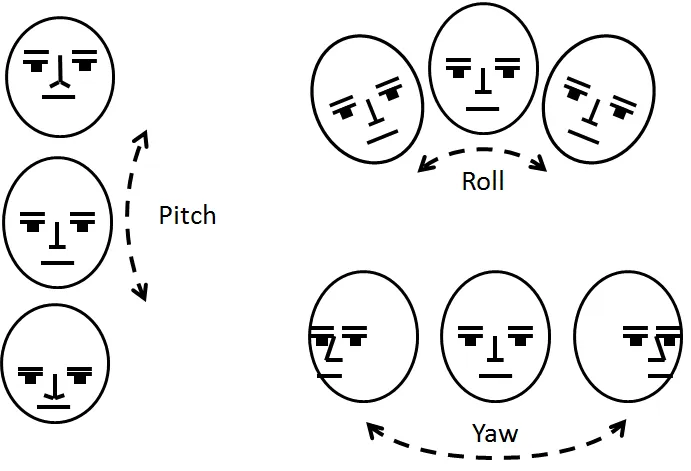

In [ ]:
# mp_face_mesh = mp.solutions.face_mesh
# face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# image = cv.imread('/content/36.jpg')



# # Flip the image horizontally for a later selfie-view display
# # Also convert the color space from BGR to RGB
# image = cv.cvtColor(cv.flip(image, 1), cv.COLOR_BGR2RGB)

# # To improve performance
# image.flags.writeable = False

# # Get the result
# results = face_mesh.process(image)

# # To improve performance
# image.flags.writeable = True

# # Convert the color space from RGB to BGR
# image = cv.cvtColor(image, cv.COLOR_RGB2BGR)

# img_h, img_w, img_c = image.shape
# face_3d = []
# face_2d = []

# if results.multi_face_landmarks:
#     for face_landmarks in results.multi_face_landmarks:
#         for idx, lm in enumerate(face_landmarks.landmark):
#             if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199:
#                 if idx == 1:
#                     nose_2d = (lm.x * img_w, lm.y * img_h)
#                     nose_3d = (lm.x * img_w, lm.y * img_h, lm.z * 8000)

#                 x, y = int(lm.x * img_w), int(lm.y * img_h)

#                 # Get the 2D Coordinates
#                 face_2d.append([x, y])

#                 # Get the 3D Coordinates
#                 face_3d.append([x, y, lm.z])

#         # Convert it to the NumPy array
#         face_2d = np.array(face_2d, dtype=np.float64)

#         # Convert it to the NumPy array
#         face_3d = np.array(face_3d, dtype=np.float64)

#         # The camera matrix
#         focal_length = 1 * img_w

#         cam_matrix = np.array([ [focal_length, 0, img_h / 2],
#                                 [0, focal_length, img_w / 2],
#                                 [0, 0, 1]])

#         # The Distance Matrix
#         dist_matrix = np.zeros((4, 1), dtype=np.float64)

#         # Solve PnP
#         success, rot_vec, trans_vec = cv.solvePnP(face_3d, face_2d, cam_matrix, dist_matrix)

#         # Get rotational matrix
#         rmat, jac = cv.Rodrigues(rot_vec)

#         # Get angles
#         angles, mtxR, mtxQ, Qx, Qy, Qz = cv.RQDecomp3x3(rmat)

#         # Get the y rotation degree
#         x = angles[0] * 360
#         y = angles[1] * 360

#         # print(y)

#         # See where the user's head tilting
#         if y < -10:
#             text = "Looking Left"
#         elif y > 10:
#             text = "Looking Right"
#         elif x < -10:
#             text = "Looking Down"
#         else:
#             text = "Forward"

#         # Display the nose direction
#         nose_3d_projection, jacobian = cv.projectPoints(nose_3d, rot_vec, trans_vec, cam_matrix, dist_matrix)

#         p1 = (int(nose_2d[0]), int(nose_2d[1]))
#         p2 = (int(nose_3d_projection[0][0][0]), int(nose_3d_projection[0][0][1]))

#         cv.line(image, p1, p2, (255, 0, 0), 2)

#         # Add the text on the image
#         cv.putText(image, text, (20, 20), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# cv2_imshow(image)

# #DOKŁADNOŚĆ?

## Head tilt detection

https://www.geeksforgeeks.org/determine-the-face-tilt-using-opencv-python/

## Python headpose library - not accurate enough

https://pypi.org/project/headpose/

## Microsoft Azure

&#10071; Azure Face API is no longer available to regular customers.

To use this API you have to send a [Face Recognition intake form](https://aka.ms/facerecognition) for review. This form is only available for companies and organizations. For academic research, you have to send an email to the specified address instead.

The detection of emotion, gender, age, smile, facial hair, hair, and makeup attributes is no longer available to new customers, and old customers will have to disable these features by the end of June 2023. Therefore, this API is no longer useful for our purposes.

In [ ]:
# !pip install --upgrade azure-cognitiveservices-vision-face

In [ ]:
# import os
# import io
# import json
# from azure.cognitiveservices.vision.face import FaceClient
# from msrest.authentication import CognitiveServicesCredentials
# import requests

# API_KEY = ""
# ENDPOINT = ""
# face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(API_KEY))

# img_file = open('0.jpg', 'rb')

# response_detection = face_client.face.detect_with_stream(
#     image=img_file,
#     detection_model='detection_01',
#     recognition_model='recognition_04',
#     return_face_attributes=['emotion'],
# )

# for face in response_detection:
#     emotion = face.face_attributes.emotion
#     neutral = '{0:.0f}%'.format(emotion.neutral * 100)
#     happiness = '{0:.0f}%'.format(emotion.happiness * 100)
#     anger = '{0:.0f}%'.format(emotion.anger * 100)
#     contempt = '{0:.0f}%'.format(emotion.contempt * 100)
#     fear = '{0:.0f}%'.format(emotion.fear * 100)
#     surprise = '{0:.0f}%'.format(emotion.surprise * 100)
#     sandness = '{0:.0f}%'.format(emotion.sadness * 100)
#     disgust = '{0:.0f}%'.format(emotion.disgust * 100)
